<a href="https://colab.research.google.com/github/CCozd/Dataset/blob/main/E_comerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción de entrega de productos en E-COMMERCE

El objetivo de este proyecto es **predecir si el producto de una empresa de comercio electrónico llegará a tiempo o no**. Este proyecto también analiza varios factores que afectan la entrega del producto y estudia el comportamiento del cliente.

### Contexto
Una empresa internacional de comercio electrónico quiere descubrir información clave de su base de datos de clientes. Quieren utilizar algunas de las técnicas de aprendizaje automátizado más avanzadas para estudiar a sus clientes. La empresa comercializa productos electrónicos.

### Diccionario de datos
El conjunto de datos utilizado para la construcción del modelo contenía 10999 observaciones de 12 variables. Los datos contienen la siguiente información:


| Variable | Description |
| --- | --- |
|ID|Número de identificación de clientes|
|Warehouse_block|	La empresa tiene un gran almacén que se divide en bloques como A,B,C,D,E|
|Mode_of_Shipment|La empresa envía los productos de múltiples formas, como por barco, por avión y por carretera.|
|Customer_care_calls|El número de llamadas realizadas desde consulta para consulta del envío.|
|Customer_rating|La empresa ha valorado a cada cliente. 1 es el más bajo (peor), 5 es el más alto (mejor)|
|Cost_of_the_Product|Costo del Producto en Dólares Estadounidenses|
|Prior_purchases|El número de compra anterior|
|Product_importance|La empresa ha clasificado el producto en diversos parámetros, como bajo, medio, alto.|
|Gender|Hombre y mujer|
|Discount_offered|	Descuento ofrecido en ese producto específico.|
|Weight_in_gms|es el peso en gramos|
|Reached.on.Time_Y.N|es la variable objetivo, donde 1 indica que el producto NO ha llegado a tiempo y 0 indica que ha llegado a tiempo|


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Cargamos dataset
df = pd.read_csv("https://raw.githubusercontent.com/CCozd/Dataset/main/E_Commerce.csv")
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


## Procesamiento de datos

In [ ]:
#Comprobación de la forma del conjunto de datos.
df.shape

(10999, 12)

In [ ]:
#Comprobación de los tipos de datos de las columnas.
df.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [ ]:
print("\nDistribución de las categorías:")
print('Cantidad de Warehouse_block:'+str(df['Warehouse_block'].nunique()))
print('Cantidad de Mode_of_Shipment:'+str(df['Mode_of_Shipment'].nunique()))
print('Cantidad de Product_importance:'+str(df['Product_importance'].nunique()))
print('Cantidad de Gender:'+str(df['Gender'].nunique()))


Distribución de las categorías:
Cantidad de Warehouse_block:5
Cantidad de Mode_of_Shipment:3
Cantidad de Product_importance:3
Cantidad de Gender:2


In [ ]:
#Eliminamos columna ID
df.drop(['ID'], axis=1, inplace=True)

In [ ]:
#Comprobación de valores nulos/faltantes
df.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [ ]:
#Comprobación de valores duplicados
df.duplicated().sum()

0

##### Estadísticas descriptivas

In [ ]:
df.describe().round(2)

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00,10999.00,10999.00,10999.00,10999.00,10999.00,10999.00
mean,4.05,2.99,210.20,3.57,13.37,3634.02,0.60
std,1.14,1.41,48.06,1.52,16.21,1635.38,0.49
min,2.00,1.00,96.00,2.00,1.00,1001.00,0.00
25%,3.00,2.00,169.00,3.00,4.00,1839.50,0.00
50%,4.00,3.00,214.00,3.00,7.00,4149.00,1.00
75%,5.00,4.00,251.00,4.00,10.00,5050.00,1.00
max,7.00,5.00,310.00,10.00,65.00,7846.00,1.00


In [ ]:
df.head(12)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1
5,F,Flight,3,1,162,3,medium,F,12,1417,1
6,D,Flight,3,4,250,3,low,F,3,2371,1
7,F,Flight,4,1,233,2,low,F,48,2804,1
8,A,Flight,3,4,150,3,low,F,11,1861,1
9,B,Flight,3,2,164,3,medium,F,29,1187,1


## Análisis exploratorio de datos

En el análisis exploratorio de datos, observaré la relación entre la variable objetivo y las otras variables. También observaré la distribución de las variables en el conjunto de datos para comprender mejor los datos.

ANÁLISIS UNIVARIADO

#### Distribución de género del cliente

Text(0.5, 1.0, 'Gender Distribution')

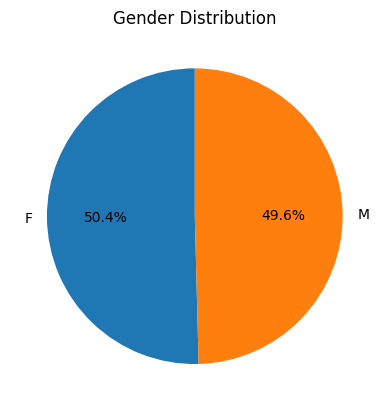

In [ ]:
plt.pie(df['Gender'].value_counts(),labels = ['F','M'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')


El conjunto de datos tiene el mismo número de clientes masculinos y femeninos, con un porcentaje del 49,6% y 50,4% respectivamente.

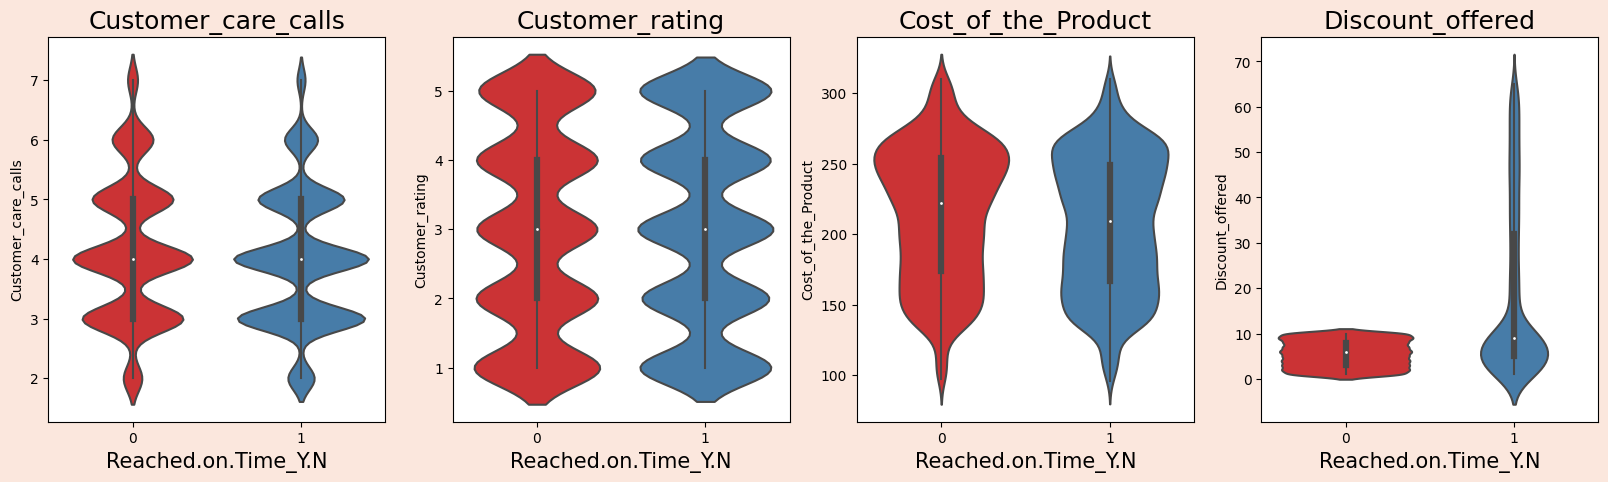

In [ ]:
def plot_norm_year_wise_data(dataset):
    _,ax=plt.subplots(1,4,figsize=(20,5),facecolor="#fbe7dd")
    g=sns.violinplot(data=df,y="Customer_care_calls",x="Reached.on.Time_Y.N",palette="Set1",ax=ax[0])
    g.xaxis.get_label().set_fontsize(15)
    g.set_title("Customer_care_calls",fontsize=18)

    g=sns.violinplot(data=df,y="Customer_rating",x="Reached.on.Time_Y.N",palette="Set1",ax=ax[1])
    g.xaxis.get_label().set_fontsize(15)
    g.set_title("Customer_rating",fontsize=18)

    g=sns.violinplot(data=df,y="Cost_of_the_Product",x="Reached.on.Time_Y.N",palette="Set1",ax=ax[2])
    g.xaxis.get_label().set_fontsize(15)
    g.set_title("Cost_of_the_Product",fontsize=18)


    g=sns.violinplot(data=df,y="Discount_offered",x="Reached.on.Time_Y.N",palette="Set1",ax=ax[3])
    g.xaxis.get_label().set_fontsize(15)
    g.set_title("Discount_offered",fontsize=18)



plot_norm_year_wise_data(df)
plt.show()


#### Propiedades del producto

Text(0.5, 1.0, 'Costo del producto')

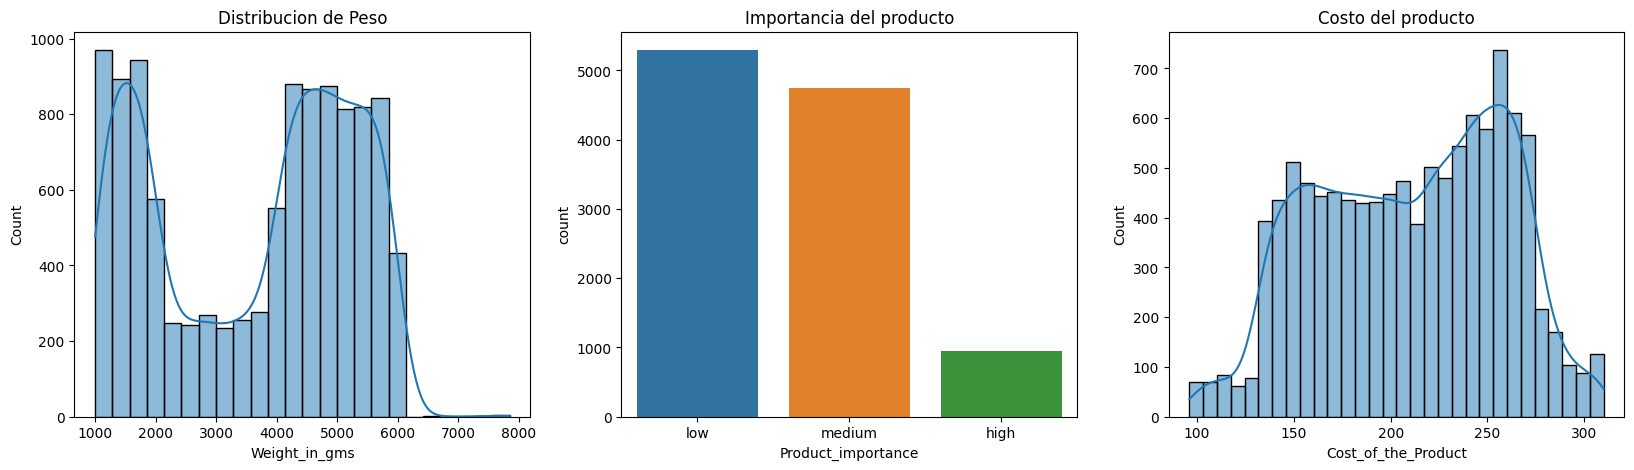

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.histplot(df['Weight_in_gms'], ax=ax[0], kde=True).set_title('Distribucion de Peso')
sns.countplot(x = 'Product_importance', data = df, ax=ax[1]).set_title('Importancia del producto')
sns.histplot(df['Cost_of_the_Product'], ax=ax[2], kde=True).set_title('Costo del producto')

Estos tres gráficos explican la distribución de las propiedades del producto: peso, costo e importancia en el conjunto de datos. En primer lugar, si observamos la distribución del peso, podemos ver que los productos que pesan entre 1.000 y 2.000 gramos y entre 4.000 y 6.000 gramos son más numerosos. Esto significa que la empresa está vendiendo más productos en estos rangos de peso. El segundo gráfico trata sobre la importancia del producto, donde la mayoría de los productos tienen una importancia baja o media. El tercer gráfico trata sobre el costo del producto. El tercer gráfico trata sobre la distribución de costos de los productos, donde hay una mayor distribución entre 150-200 y 225-275 dólares.

#### Logistica

Text(0.5, 1.0, 'Reached on Time')

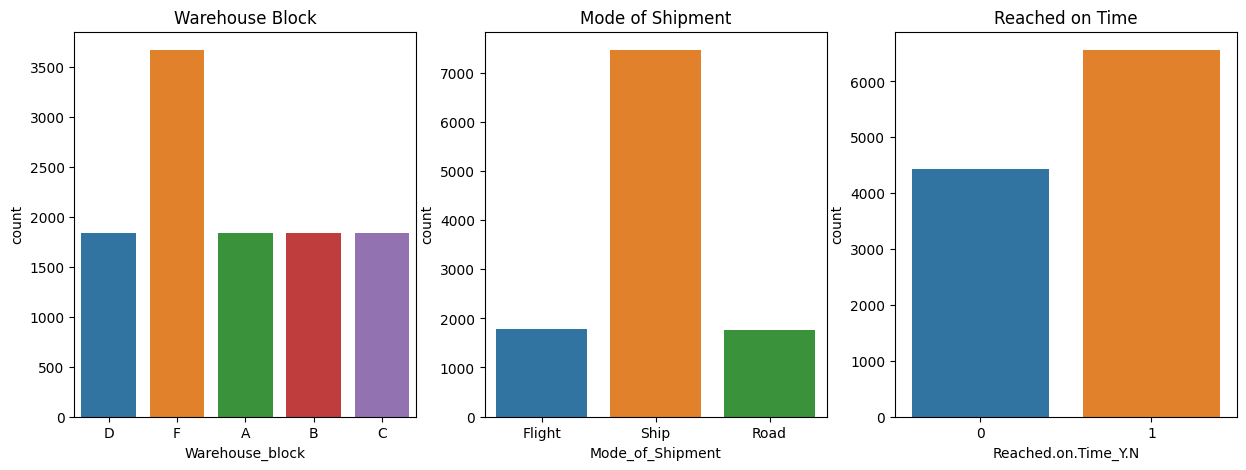

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x = 'Warehouse_block', data = df, ax=ax[0]).set_title('Warehouse Block')
sns.countplot(x = 'Mode_of_Shipment', data = df, ax=ax[1]).set_title('Mode of Shipment')
sns.countplot(x = 'Reached.on.Time_Y.N', data = df, ax=ax[2]).set_title('Reached on Time')

Los gráficos anteriores visualizan la logística y entrega del producto. En el primer gráfico, podemos ver que la cantidad de productos del almacén F es mayor, es decir, 3500, mientras que el resto de los almacenes tienen una cantidad casi igual de productos. El segundo gráfico trata sobre el envío del producto, donde la mayoría de los productos se envían por barco, mientras que casi 2000 productos se envían por avión y por carretera. El tercer gráfico trata sobre la entrega oportuna del producto donde podemos ver que la cantidad de productos entregados a tiempo es mayor que la cantidad de productos no entregados a tiempo.

De todo el gráfico anterior, supongo que el almacén F está cerca del puerto marítimo, porque el almacén F tiene la mayor cantidad de productos y la mayoría de los productos se envían por barco.

#### Experiencia del cliente

Text(0.5, 1.0, 'Discount Offered')

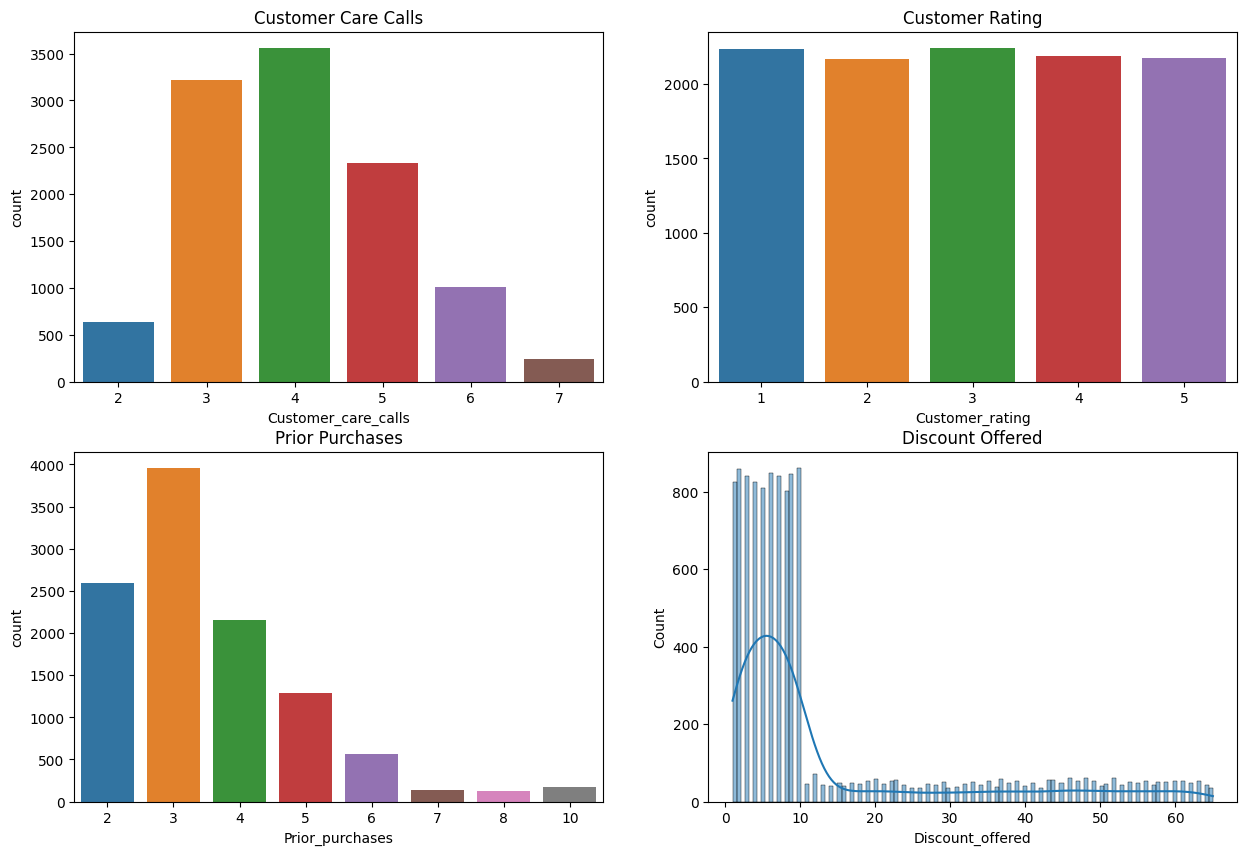

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
sns.countplot(x = 'Customer_care_calls', data = df, ax=ax[0,0]).set_title('Customer Care Calls')
sns.countplot(x = 'Customer_rating', data = df, ax=ax[0,1]).set_title('Customer Rating')
sns.countplot(x = 'Prior_purchases', data = df, ax=ax[1,0]).set_title('Prior Purchases')
sns.histplot(x = 'Discount_offered', data = df, ax=ax[1,1], kde = True).set_title('Discount Offered')

Los gráficos anteriores visualizan la experiencia del cliente en función de sus llamadas de atención al cliente, calificación, compras anteriores y descuentos ofrecidos. El primer gráfico muestra la cantidad de llamadas de atención al cliente realizadas por los clientes, donde podemos ver que la mayoría de los clientes han realizado de 3 a 4 llamadas, lo que podría ser un indicador potencial, que muestra que los clientes podrían enfrentar la entrega del producto. En el segundo gráfico, podemos ver que el recuento de calificaciones de los clientes en todas las calificaciones es el mismo, pero hay un poco más en la calificación 1, lo que significa que los clientes no están satisfechos con el servicio.

El tercer gráfico es sobre las compras anteriores realizadas por los clientes, donde podemos ver que la mayoría de los clientes han realizado 2-3 compras anteriores, lo que significa que los clientes que tienen compras anteriores están satisfechos con el servicio y están comprando más productos. El cuarto gráfico trata sobre el descuento ofrecido en los productos, donde podemos ver que la mayoría de los productos tienen entre 0 y 10% de descuento, lo que significa que la empresa no ofrece muchos descuentos en los productos.


#### Género del cliente y entrega del producto

Text(0.5, 1.0, 'Genero vs tiempo alcanzado')

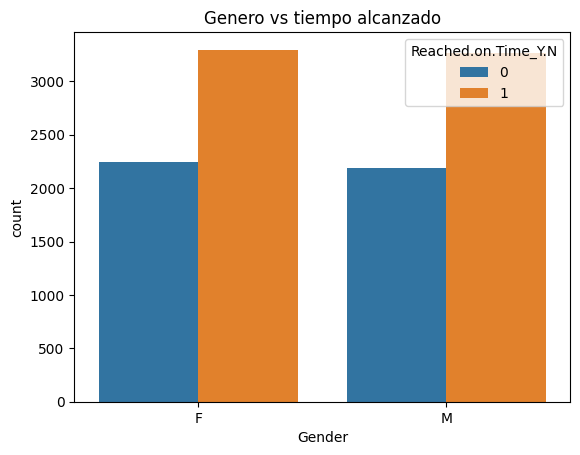

In [ ]:
sns.countplot(x = 'Gender', data = df, hue = 'Reached.on.Time_Y.N').set_title('Genero vs tiempo alcanzado')


La cantidad de productos entregados a tiempo para ambos sexos es la misma, lo que significa que no existe relación entre el sexo del cliente y la entrega del producto.


#### Propiedades del producto y entrega del producto

Text(0.5, 1.0, 'Costo del Producto')

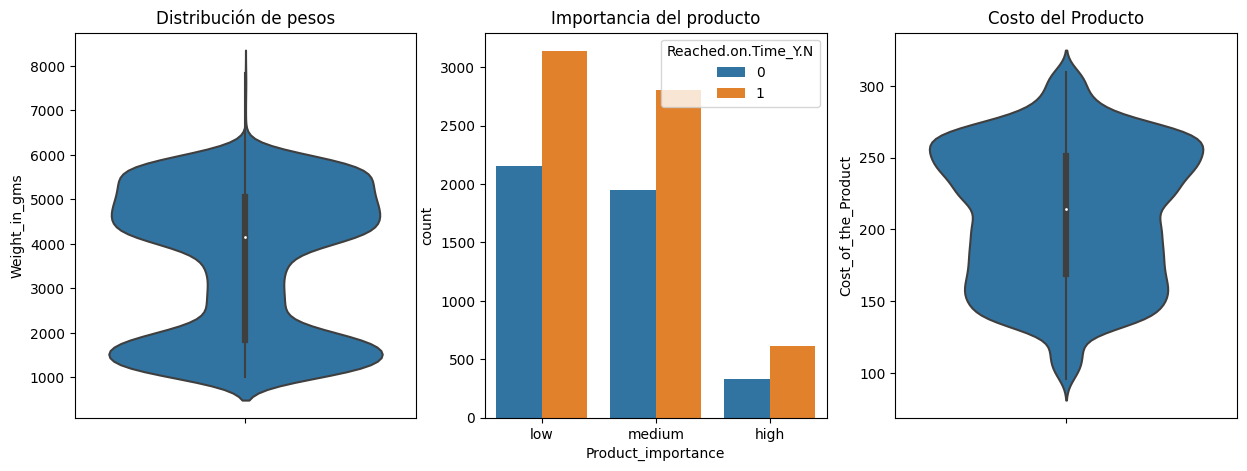

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.violinplot(y = df['Weight_in_gms'], ax=ax[0], hue = df['Reached.on.Time_Y.N']).set_title('Distribución de pesos')
sns.countplot(x = 'Product_importance', data = df, ax=ax[1], hue = 'Reached.on.Time_Y.N').set_title('Importancia del producto')
sns.violinplot(y = df['Cost_of_the_Product'], ax=ax[2], hue = df['Reached.on.Time_Y.N']).set_title('Costo del Producto')

Los gráficos anteriores visualizan la relación entre las propiedades del producto y la entrega del producto. En el primer gráfico, queda bastante claro que el peso del producto tiene un impacto en la entrega oportuna del producto. Los productos que pesan más de 4500 gramos no se entregan a tiempo, además de que más productos que pesan entre 2500 y 3500 gramos se entregan a tiempo. El segundo gráfico trata sobre la importancia del producto y la entrega del producto, donde podemos ver que no hay gran diferencia entre la entrega del producto según la importancia del producto. El tercer gráfico muestra la relación entre el costo del producto y la entrega del producto, donde podemos ver que los productos que cuestan más de 250 tienen mayor conteo de no entregados a tiempo.

De esto concluyo que el peso y el costo del producto tienen un impacto en la entrega del producto.


#### Logística y entrega de productos

Text(0.5, 1.0, 'Mode of Shipment')

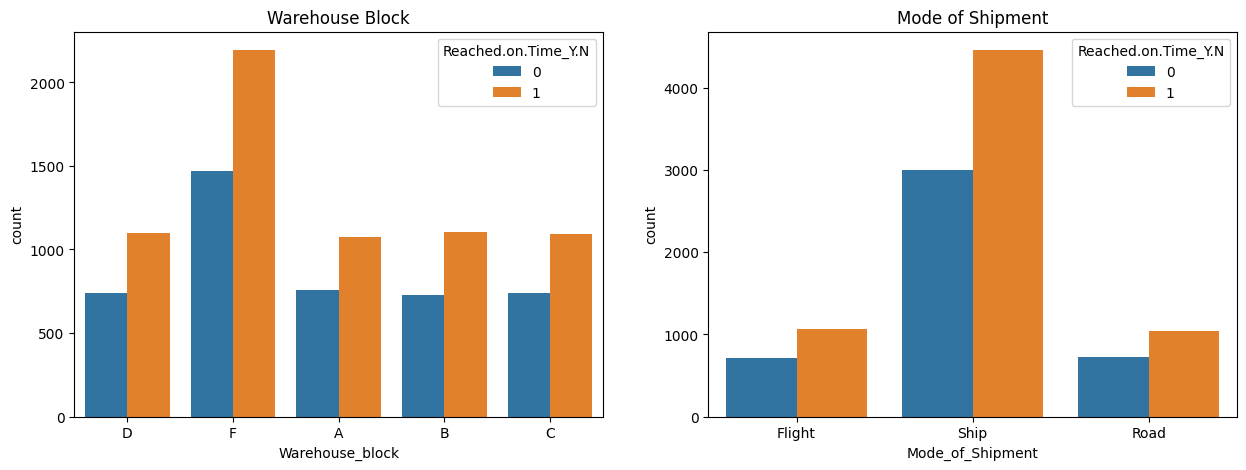

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x = 'Warehouse_block', data = df, ax=ax[0], hue = 'Reached.on.Time_Y.N').set_title('Warehouse Block')
sns.countplot(x = 'Mode_of_Shipment', data = df, ax=ax[1], hue = 'Reached.on.Time_Y.N').set_title('Mode of Shipment')

Estos gráficos explican la relación entre la Logística y la entrega oportuna del producto. Dado que la mayoría de los productos se envían desde el almacén F, supuse que el almacén F está cerca del puerto marítimo y que la mayoría de los productos se envían por barco. En ambos gráficos, la diferencia entre la cantidad de productos entregados a tiempo y no entregados a tiempo es constante en todos los bloques de almacén y modo de envío. Esto significa que la logística y el modo de envío no tienen ningún impacto en la entrega del producto.


#### Experiencia del cliente y entrega del producto

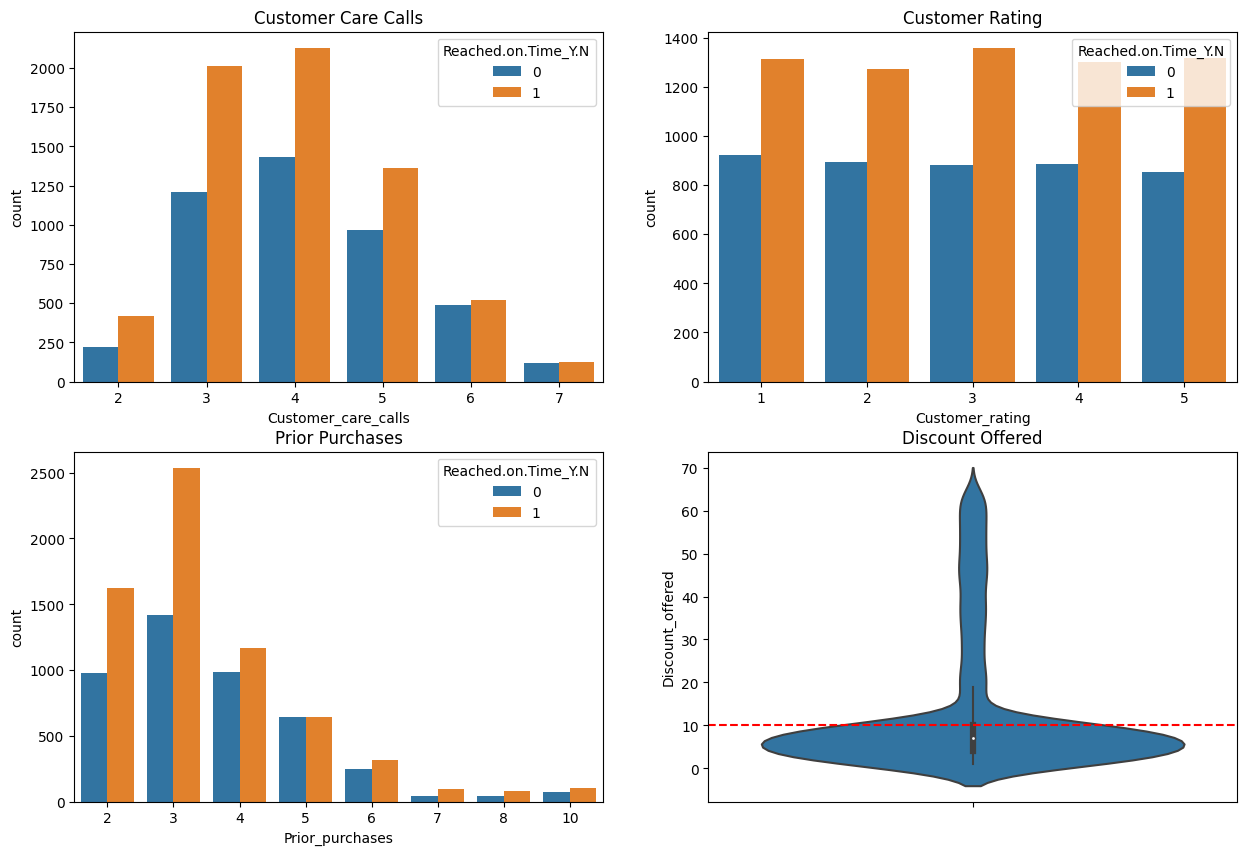

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
sns.countplot(x = 'Customer_care_calls', data = df, ax=ax[0,0],hue = 'Reached.on.Time_Y.N').set_title('Customer Care Calls')
sns.countplot(x = 'Customer_rating', data = df, ax=ax[0,1],hue = 'Reached.on.Time_Y.N').set_title('Customer Rating')
sns.countplot(x = 'Prior_purchases', data = df, ax=ax[1,0],hue = 'Reached.on.Time_Y.N').set_title('Prior Purchases')
sns.violinplot(hue = 'Reached.on.Time_Y.N', y = 'Discount_offered' ,data = df, ax=ax[1,1]).set_title('Discount Offered')
plt.axhline(y = 10, color = 'red', linestyle = '--')


Es importante comprender la experiencia del cliente y responder a los servicios prestados por la empresa de comercio electrónico. Los gráficos anteriores explican la relación entre la experiencia del cliente y la entrega del producto. El primer gráfico trata sobre las llamadas de atención al cliente y la entrega del producto, donde vemos que la diferencia en la entrega oportuna y tardía del producto disminuye con el aumento en el número de llamadas del cliente, lo que significa que con el retraso en la entrega del producto el cliente recibe ansioso por el producto y llama al servicio de atención al cliente. El segundo gráfico trata sobre la calificación de los clientes y la entrega de productos, donde podemos ver que los clientes que califican no tienen impacto con el número de productos entregados a tiempo.

El tercer gráfico trata sobre la compra anterior del cliente, que también muestra que los clientes que han realizado más compras anteriores tienen un mayor número de productos entregados a tiempo y esta es la razón por la que vuelven a comprar a la empresa. El cuarto gráfico es sobre el descuento ofrecido en el producto y la entrega del producto, donde podemos ver que los productos que tienen un descuento del 0 al 10% tienen un mayor recuento de productos entregados tarde, mientras que los productos que tienen un descuento superior al 10% tienen un mayor recuento de productos. entregado a tiempo.

## Procesamiento de datos 2


#### Etiqueta que codifica las variables categóricas

In [ ]:
#Transformar texto a numeros
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cols = ['Warehouse_block','Mode_of_Shipment','Product_importance', 'Gender']

for i in cols:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    print(i, df[i].unique())

Warehouse_block [3 4 0 1 2]
Mode_of_Shipment [0 2 1]
Product_importance [1 2 0]
Gender [0 1]



## Mapa de calor de la matriz de correlación

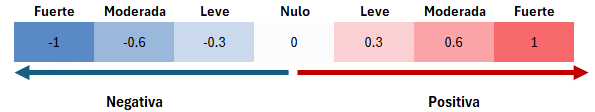

<Axes: >

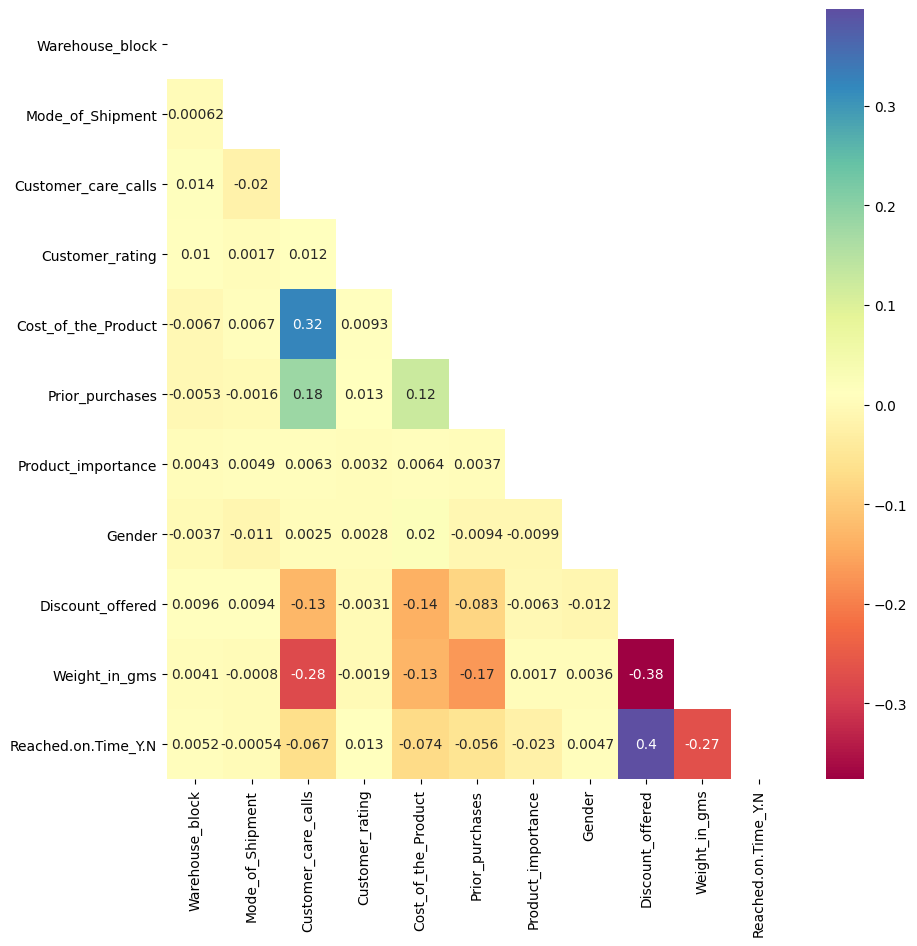

In [ ]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='Spectral',mask = mask)

En el mapa de calor de la matriz de correlación, podemos ver que existe una correlación positiva entre el costo del producto y la cantidad de llamadas de atención al cliente.

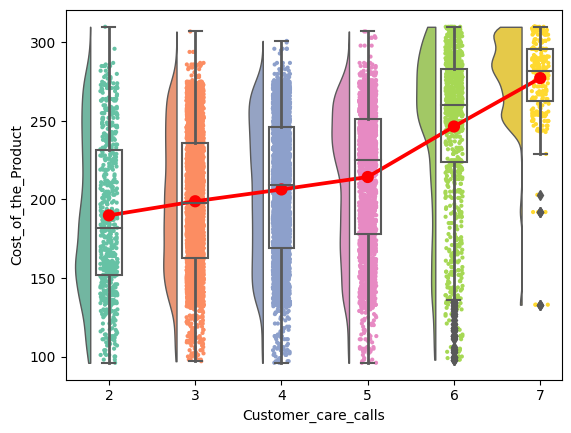

In [ ]:
#sns.violinplot(x=df['Customer_care_calls'], y=df['Cost_of_the_Product'], palette="Set2")
#!pip install ptitprince
import ptitprince as pt
figsize=(30,20)
ax = pt.RainCloud(x=df['Customer_care_calls'], y=df['Cost_of_the_Product'], palette="Set2",pointplot=True,width_viol=0.7,width_box=0.3)#,orient='h')

Está claro que los clientes están más preocupados por la entrega del producto cuando el costo del producto es alto. Este es el motivo por el que llaman al servicio de atención al cliente para conocer el estado del producto. Por lo tanto, es importante asegurarse de que la entrega del producto se realice a tiempo cuando el costo del producto es alto.

## División de la prueba de entrenamiento

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Reached.on.Time_Y.N', axis=1), df['Reached.on.Time_Y.N'], test_size=0.2, random_state=0)

## Construcción del modelo

Usaremos los siguientes modelos para predecir la entrega del producto:

Clasificador de bosque aleatorio
Clasificador de árbol de decisión
Regresión logística
K vecinos más cercanos

#### Clasificador de bosque aleatorio

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Objeto clasificador de bosque aleatorio
rfc = RandomForestClassifier()

In [ ]:
#Uso de GridSearchCV para ajuste de hiperparámetros
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [4,8,12,16],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
}

#Objeto GridSearchCV
grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

#Entrenando el modelo
grid.fit(X_train, y_train)

#Imprimiendo los mejores parametros
print('Mejores parametros: ', grid.best_params_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Mejores parametros:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 2, 'random_state': 42}


In [ ]:
#Objeto clasificador de bosque aleatorio
rfc = RandomForestClassifier(criterion='gini', max_depth=8, min_samples_leaf=8, min_samples_split=2, random_state=42)

#Entrenando el modelo
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=8, random_state=42)

In [ ]:
#Precisión del entrenamiento
print('Precisión del entrenamiento: ', rfc.score(X_train, y_train))

Precisión del entrenamiento:  0.7253096942834413


In [ ]:
#Prediccion
rfc_pred = rfc.predict(X_test)

#### Clasificador de árbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#Objeto clasificador de árbol de decisión
dtc = DecisionTreeClassifier()

In [ ]:
#Uso de GridSearchCV para ajuste de hiperparámetros
from sklearn.model_selection import GridSearchCV
#Parametros
param_grid = {
    'max_depth': [2,4,6,8],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]}

#Objeto GridSearchCV
grid = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

#Entrenando el modelo
grid.fit(X_train, y_train)

#Imprmiendo los mejores parametros
print('Mejores parametros: ', grid.best_params_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Mejores parametros:  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 2, 'random_state': 0}


In [ ]:
#Objeto clasificador de árbol de decisión
dtc = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf=6, min_samples_split=2, random_state=0, class_weight='balanced')

#Entrenando el modelo
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, min_samples_leaf=6,
                       random_state=0)

In [ ]:
#Precisión del entrenamiento
print('Precisicion: ', dtc.score(X_train, y_train))

Precisicion:  0.6913285600636436


In [ ]:
#Prediccion
dtc_pred = dtc.predict(X_test)

#### Regresión logística

In [ ]:
from sklearn.linear_model import LogisticRegression

#Objeto de regresión logística
lr = LogisticRegression()

In [ ]:
#Entrenando el modelo
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Precisión del entrenamiento
lr.score(X_train, y_train)

0.6356404136833731

In [ ]:
#Prediccion
lr_pred = lr.predict(X_test)

#### k vecinos más próximos

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Objeto clasificador KNN
knn = KNeighborsClassifier()

In [ ]:
#Entrenando el modelo
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
#Precision del entrenamiento
knn.score(X_train, y_train)

0.7780429594272077

In [ ]:
#prediccion
knn_pred = knn.predict(X_test)

DANIEL PALACIN

## Evaluacion del modelo

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, r2_score, mean_squared_error

Text(0.5, 1.0, 'KNN Classifier')

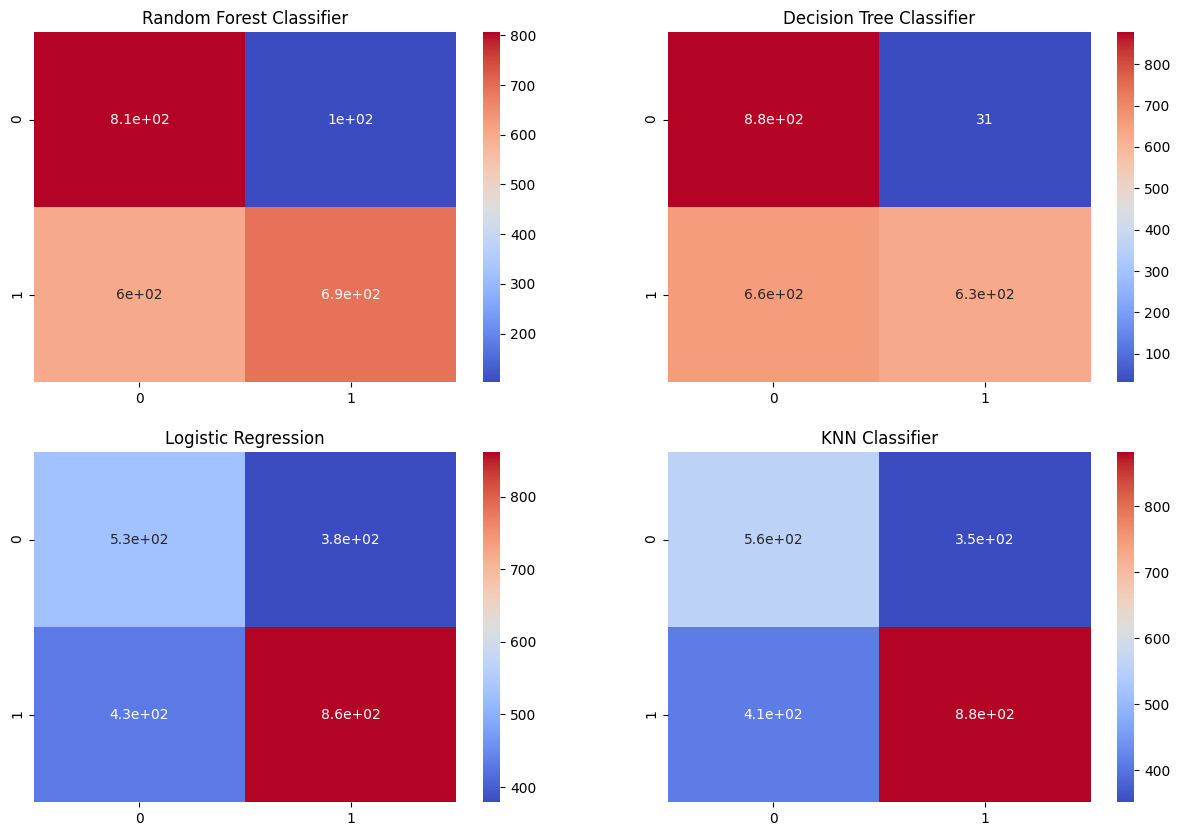

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, cmap='coolwarm', ax=ax[0,0]).set_title('Random Forest Classifier')
sns.heatmap(confusion_matrix(y_test, dtc_pred), annot=True, cmap='coolwarm', ax=ax[0,1]).set_title('Decision Tree Classifier')
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, cmap='coolwarm', ax=ax[1,0]).set_title('Logistic Regression')
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, cmap='coolwarm', ax=ax[1,1]).set_title('KNN Classifier')

In [ ]:
#informe de clasificación
print('Random Forest Classifier: \n', classification_report(y_test, rfc_pred))
print('Decision Tree Classifier: \n', classification_report(y_test, dtc_pred))
print('Logistic Regression: \n', classification_report(y_test, lr_pred))
print('KNN Classifier: \n', classification_report(y_test, knn_pred))

Random Forest Classifier: 
               precision    recall  f1-score   support

           0       0.57      0.89      0.70       908
           1       0.87      0.54      0.66      1292

    accuracy                           0.68      2200
   macro avg       0.72      0.71      0.68      2200
weighted avg       0.75      0.68      0.68      2200

Decision Tree Classifier: 
               precision    recall  f1-score   support

           0       0.57      0.97      0.72       908
           1       0.95      0.49      0.65      1292

    accuracy                           0.69      2200
   macro avg       0.76      0.73      0.68      2200
weighted avg       0.80      0.69      0.68      2200

Logistic Regression: 
               precision    recall  f1-score   support

           0       0.55      0.58      0.57       908
           1       0.69      0.67      0.68      1292

    accuracy                           0.63      2200
   macro avg       0.62      0.62      0.62      

##Comparacion del Modelo

Text(0, 0.5, 'Accuracy')

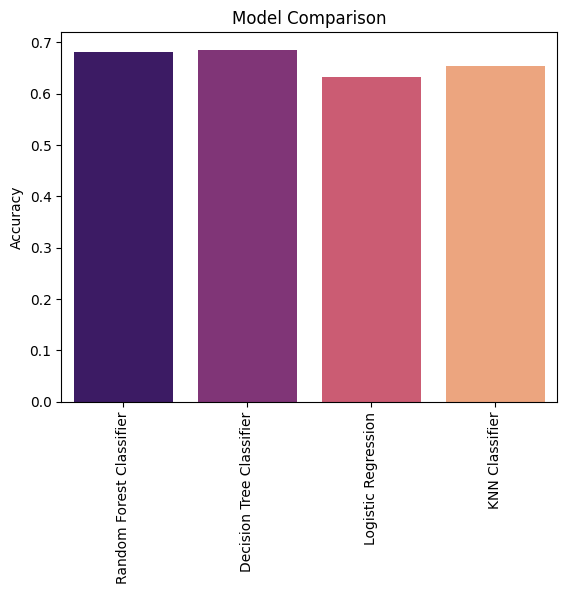

In [ ]:
models = ['Random Forest Classifier', 'Decision Tree Classifier', 'Logistic Regression', 'KNN Classifier']
accuracy = [accuracy_score(y_test, rfc_pred), accuracy_score(y_test, dtc_pred), accuracy_score(y_test, lr_pred), accuracy_score(y_test, knn_pred)]
sns.barplot(x=models, y=accuracy, palette='magma').set_title('Model Comparison')
plt.xticks(rotation=90)
plt.ylabel('Accuracy')

## Conclusion

El objetivo del proyecto era predecir si el producto de una empresa de comercio electrónico llegará a tiempo o no.
Este proyecto también analiza varios factores que afectan la entrega del producto y estudia el comportamiento del cliente.
A partir del análisis exploratorio de datos,se decubrio que el peso y el costo del producto tienen un impacto en la entrega del producto, donde el producto que pesa entre 2500 y 3500 gramos y cuesta menos de 250 dólares tiene una mayor tasa de entrega a tiempo. La mayoría de los productos se enviaron desde el almacén F por barco, por lo que es muy posible que el almacén F esté cerca de un puerto marítimo.

El comportamiento del cliente también ayuda a predecir la entrega oportuna del producto. Cuanto más llame el cliente, mayores serán las posibilidades de que se retrase la entrega del producto. Curiosamente, los clientes que han realizado más compras anteriores tienen un mayor número de productos entregados a tiempo y esta es la razón por la que vuelven a comprar a la empresa. Los productos que tienen un descuento del 0 al 10 % tienen un mayor número de productos entregados tarde, mientras que los productos que tienen un descuento superior al 10 % tienen un mayor número de productos entregados a tiempo.

En cuanto a los modelos de aprendizaje automático, el clasificador de árbol de decisión tiene la mayor precisión entre los demás modelos, con una precisión del 69%. El clasificador forestal aleatorio y la regresión logística tuvieron una precisión del 68% y 67% respectivamente. Los K Vecinos más cercanos tuvieron la precisión más baja del 65%.of 65%.